In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu

# 读取数据
file_path = 'data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
data =data.drop(columns=['code','name','省份'])
# 分离违约和未违约样本
default_group = data[data['Y'] == 1].drop(columns=['Y'])
non_default_group = data[data['Y'] == 0].drop(columns=['Y'])
# 初始化筛选结果
# 初始化保存结果的DataFrame
results = pd.DataFrame(columns=['变量名称', '时间点', '正常样本均值', '违约样本均值', 'P值（双侧）'])

# 设置P值阈值
p_value_threshold = 0.05

time_points = ['T-1', 'T-2', 'T-3']
features = {time_point: [col for col in data.columns if time_point in col] for time_point in time_points}
# 提取没有时间标识的特征（如行业变量 X39）
non_time_features = [col for col in data.columns if col not in features['T-1'] + features['T-2'] + features['T-3'] and col != 'Y']
for time_point in time_points:
    features[time_point] += non_time_features
    for feature in data.columns:
        if time_point in feature:  # 检查列名是否包含当前时间点
            try:
                # 计算均值
                non_default_mean = non_default_group[feature].mean()
                default_mean = default_group[feature].mean()
                
                # 进行U检验
                stat, p_value = mannwhitneyu(non_default_group[feature], default_group[feature], alternative='two-sided')
                
                # 保存结果
                results = results.append({
                    '变量名称': feature,
                    '时间点': time_point,
                    '正常样本均值': non_default_mean,
                    '违约样本均值': default_mean,
                    'P值（双侧）': p_value
                }, ignore_index=True)
            except Exception as e:
                print(f"Error processing feature {feature} at {time_point}: {e}")

# 打印结果
print("\nU Test Results:")
print(results)

# 保存结果到Excel文件
# results.to_excel('utest.xlsx', index=False)
# print("\nU Test Results saved to 'u_test_results.xlsx'")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



U Test Results:
        变量名称  时间点      正常样本均值      违约样本均值        P值（双侧）
0     X1_T-1  T-1    0.450019   -0.594048  1.211140e-11
1     X2_T-1  T-1    0.068640   -0.373921  6.361670e-11
2     X3_T-1  T-1    0.051327   -0.066213  2.629561e-10
3     X4_T-1  T-1    0.276383    0.175645  3.510394e-03
4     X5_T-1  T-1    0.071791   -0.847093  1.876356e-11
..       ...  ...         ...         ...           ...
124  X41_T-3  T-3    0.017883    0.017883  1.000000e+00
125  X42_T-3  T-3   99.989347   99.989347  1.000000e+00
126  X43_T-3  T-3  352.512125  352.512125  1.000000e+00
127  X44_T-3  T-3  147.719486  147.719486  1.000000e+00
128  X45_T-3  T-3   97.517292   97.517292  1.000000e+00

[129 rows x 5 columns]


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/2707902883.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/2707902883.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/2707902883.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/2707902883.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/2707902883.py:3

['X37', 'X39']

In [2]:


# 初始化保存结果的DataFrame
descriptive_stats = pd.DataFrame(columns=['变量名称', '时间点', '违约组样本均值', '违约组样本标准差', '违约组样本中位数', '正常样本均值', '正常样本标准差', '正常样本中位数'])

# 对每个时间点进行描述性统计
for time_point in time_points:
    features[time_point] += non_time_features
    for feature in data.columns:
        if time_point in feature:  # 检查列名是否包含当前时间点
            try:
                # 计算违约组和正常组的描述性统计
                default_group_des = default_group[feature].describe(percentiles=[0.25, 0.5, 0.75])
                non_default_group_des = non_default_group[feature].describe(percentiles=[0.25, 0.5, 0.75])
                
                # 保存结果
                descriptive_stats = descriptive_stats.append({
                    '变量名称': feature,
                    #'时间点': time_point,
                    '违约组样本均值': default_group_des['mean'],
                    '违约组样本标准差': default_group_des['std'],
                    '违约组样本中位数': default_group_des['50%'],
                    '正常样本均值': non_default_group_des['mean'],
                    '正常样本标准差': non_default_group_des['std'],
                    '正常样本中位数': non_default_group_des['50%']
                }, ignore_index=True)
            except Exception as e:
                print(f"Error processing feature {feature} at {time_point}: {e}")

# 打印结果
print(descriptive_stats)

# 可选：保存到 Excel 文件
descriptive_stats.to_excel('descriptive_stats2026.xlsx', index=False)
print("描述性统计已保存到 'descriptive_stats.xlsx'")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/1060543985.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats = descriptive_stats.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/1060543985.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats = descriptive_stats.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/1060543985.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats = descriptive_stats.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/1060543985.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats = descriptive_sta

        变量名称  时间点     违约组样本均值    违约组样本标准差    违约组样本中位数      正常样本均值     正常样本标准差  \
0     X1_T-1  NaN   -0.594048    1.173013   -0.242000    0.450019    0.789135   
1     X2_T-1  NaN   -0.373921    1.612134   -0.054310    0.068640    0.151811   
2     X3_T-1  NaN   -0.066213    0.186204   -0.013347    0.051327    0.067899   
3     X4_T-1  NaN    0.175645    0.204490    0.205091    0.276383    0.166346   
4     X5_T-1  NaN   -0.847093    2.338208   -0.152946    0.071791    0.152209   
..       ...  ...         ...         ...         ...         ...         ...   
124  X41_T-3  NaN    0.017883    0.006946    0.016000    0.017883    0.006907   
125  X42_T-3  NaN   99.989347    3.252440   98.951667   99.989347    3.234219   
126  X43_T-3  NaN  352.512125  161.845064  364.833333  352.512125  160.938361   
127  X44_T-3  NaN  147.719486   40.818477  145.127500  147.719486   40.589800   
128  X45_T-3  NaN   97.517292    9.677589   98.679167   97.517292    9.623372   

        正常样本中位数  
0      0.

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/1060543985.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats = descriptive_stats.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/1060543985.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats = descriptive_stats.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/1060543985.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats = descriptive_stats.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/1060543985.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats = descriptive_sta

In [29]:
descriptive_stats

,变量名称,时间点,违约组样本均值,违约组样本标准差,违约组样本中位数,正常样本均值,正常样本标准差,正常样本中位数
0,X1_T-1,NaN,-0.594048,1.173013,-0.242000,0.450019,0.789135,0.290000
1,X2_T-1,NaN,-0.373921,1.612134,-0.054310,0.068640,0.151811,0.077622
2,X3_T-1,NaN,-0.066213,0.186204,-0.013347,0.051327,0.067899,0.048532
3,X4_T-1,NaN,0.175645,0.204490,0.205091,0.276383,0.166346,0.248422
4,X5_T-1,NaN,-0.847093,2.338208,-0.152946,0.071791,0.152209,0.066614
...,...,...,...,...,...,...,...,...
124,X41_T-3,NaN,0.017883,0.006946,0.016000,0.017883,0.006907,0.016000
125,X42_T-3,NaN,99.989347,3.252440,98.951667,99.989347,3.234219,98.951667
126,X43_T-3,NaN,352.512125,161.845064,364.833333,352.512125,160.938361,364.833333
127,X44_T-3,NaN,147.719486,40.818477,145.127500,147.719486,40.589800,145.127500


In [3]:
# 加载U检验结果
u_test_results = pd.read_excel('utest.xlsx')

# 设置P值阈值
p_value_threshold = 0.05

# 筛选显著的因子
significant_factors = u_test_results[u_test_results['P值（双侧）'] < p_value_threshold]['变量名称'].unique()
print("显著的因子：", significant_factors)

显著的因子： ['X1_T-3' 'X2_T-3' 'X3_T-3' 'X9_T-3' 'X11_T-3' 'X12_T-3' 'X15_T-3'
 'X17_T-3' 'X18_T-3' 'X20_T-3' 'X31_T-3' 'X32_T-3' 'X33_T-3' 'X36_T-3'
 'X1_T-2' 'X2_T-2' 'X3_T-2' 'X5_T-2' 'X7_T-2' 'X9_T-2' 'X10_T-2' 'X11_T-2'
 'X12_T-2' 'X13_T-2' 'X15_T-2' 'X17_T-2' 'X18_T-2' 'X20_T-2' 'X24_T-2'
 'X25_T-2' 'X27_T-2' 'X31_T-2' 'X32_T-2' 'X33_T-2' 'X36_T-2' 'X1_T-1'
 'X2_T-1' 'X3_T-1' 'X4_T-1' 'X5_T-1' 'X6_T-1' 'X7_T-1' 'X8_T-1' 'X9_T-1'
 'X10_T-1' 'X12_T-1' 'X13_T-1' 'X15_T-1' 'X16_T-1' 'X17_T-1' 'X18_T-1'
 'X19_T-1' 'X20_T-1' 'X21_T-1' 'X23_T-1' 'X24_T-1' 'X25_T-1' 'X26_T-1'
 'X27_T-1' 'X28_T-1' 'X29_T-1' 'X31_T-1' 'X32_T-1' 'X33_T-1' 'X36_T-1'
 'X38_T-1']


In [4]:
# 从原始数据中提取显著的因子
significant_data = data[significant_factors]

In [5]:
from scipy.stats import pearsonr

# 初始化保存Pearson相关性检验结果的DataFrame
pearson_results = pd.DataFrame(columns=['时间点', '因子1', '因子2', '相关系数', 'P值'])
# 初始化一个字典来保存每个时间点的相关系数矩阵
relation_matrices = {time_point: pd.DataFrame() for time_point in time_points}
# 对每个时间点进行Pearson相关性检验
time_points = ['T-3', 'T-2', 'T-1']
for time_point in time_points:
    # 提取当前时间点的显著因子
    factors = [col for col in significant_factors if time_point in col]
    for i in range(len(factors)):
        for j in range(i + 1, len(factors)):
            factor1, factor2 = factors[i], factors[j]
            r, p_value = pearsonr(significant_data[factor1], significant_data[factor2])
            pearson_results = pearson_results.append({
                '时间点': time_point,
                '因子1': factor1,
                '因子2': factor2,
                '相关系数': r,
                'P值': p_value
            }, ignore_index=True)
            # 保存相关系数到矩阵
            relation_matrices[time_point].loc[factor1, factor2] = r
            relation_matrices[time_point].loc[factor2, factor1] = r  # 确保矩阵是对称
# 打印Pearson相关性检验结果
print("\nPearson Correlation Results:")
print(pearson_results)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users


Pearson Correlation Results:
     时间点      因子1      因子2      相关系数            P值
0    T-3   X1_T-3   X2_T-3  0.582708  3.201173e-23
1    T-3   X1_T-3   X3_T-3  0.557479  5.338683e-21
2    T-3   X1_T-3   X9_T-3 -0.138672  3.175557e-02
3    T-3   X1_T-3  X11_T-3 -0.050623  4.350099e-01
4    T-3   X1_T-3  X12_T-3  0.154559  1.655968e-02
..   ...      ...      ...       ...           ...
761  T-1  X32_T-1  X36_T-1 -0.217244  7.027169e-04
762  T-1  X32_T-1  X38_T-1  0.066345  3.060350e-01
763  T-1  X33_T-1  X36_T-1  0.271128  2.059006e-05
764  T-1  X33_T-1  X38_T-1 -0.162448  1.172681e-02
765  T-1  X36_T-1  X38_T-1 -0.208235  1.175463e-03

[766 rows x 5 columns]


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23612/678799720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pearson_results = pearson_results.append({
C:\Users

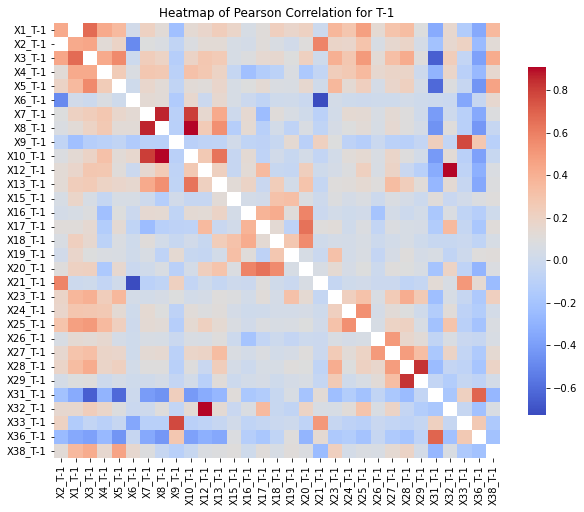

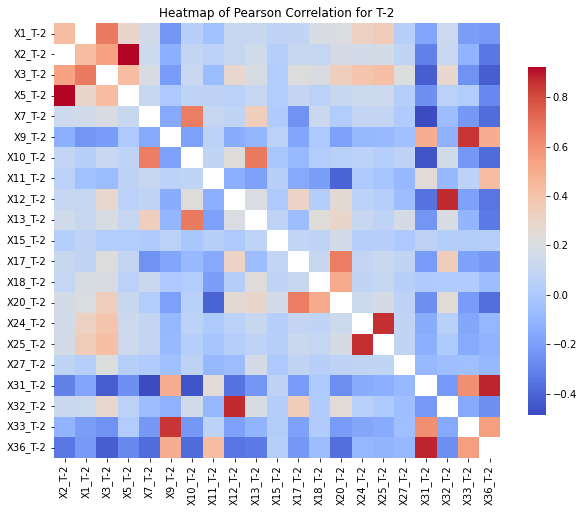

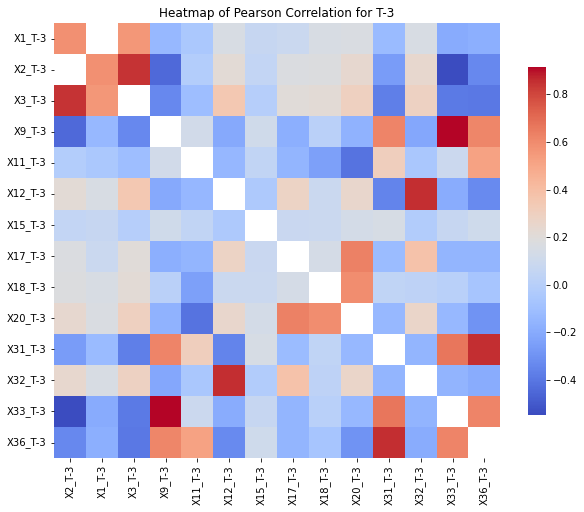

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
results_heatmap = pearson_results.pivot("因子1", "因子2", "相关系数")
for time_point, relation_matrix in relation_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(relation_matrix, annot=False, cmap='coolwarm', cbar_kws={"shrink": .8}, fmt='.2f')
    plt.title(f'Heatmap of Pearson Correlation for {time_point}')
    plt.savefig(f'heatmap_{time_point}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [20]:
pearson_results

,时间点,因子1,因子2,相关系数,P值
0,T-3,X1_T-3,X2_T-3,0.582708,3.201173e-23
1,T-3,X1_T-3,X3_T-3,0.557479,5.338683e-21
2,T-3,X1_T-3,X9_T-3,-0.138672,3.175557e-02
3,T-3,X1_T-3,X11_T-3,-0.050623,4.350099e-01
4,T-3,X1_T-3,X12_T-3,0.154559,1.655968e-02
...,...,...,...,...,...
761,T-1,X32_T-1,X36_T-1,-0.217244,7.027169e-04
762,T-1,X32_T-1,X38_T-1,0.066345,3.060350e-01
763,T-1,X33_T-1,X36_T-1,0.271128,2.059006e-05
764,T-1,X33_T-1,X38_T-1,-0.162448,1.172681e-02
